In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.multi_quadratic_banana_pullback_manifold import MultiQuadraticBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


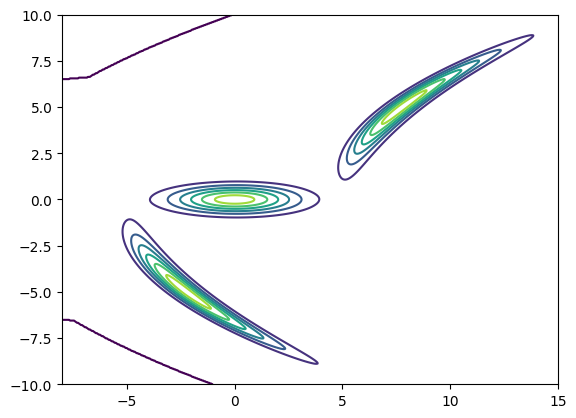

In [2]:
double_banana_manifold = MultiQuadraticBananaPullbackManifold()

xx = torch.linspace(-8.0, 15.0, 500)
yy = torch.linspace(-10.0, 10.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(double_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([10.,7.])
x1 = torch.tensor([2.,-1/4])
x2 = torch.tensor([1.,-7.5])

L = 100
tol = 1e-3
max_iter = 20000
step_size = 1/32

In [4]:
# # test barycentre # TODO this might be very hard to compute...
# x=torch.zeros((3,2))
# x[0] = x0
# x[1] = x1
# x[2] = x2

# barycentre = double_banana_manifold.barycentre(x).detach().numpy()

# plt.contour(x_grid, y_grid, density_banana)
# plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
# plt.scatter(barycentre[0], barycentre[1], color="orange")
# plt.savefig("results/quadratic_double_banana/barycentre.eps")
# plt.show()

In [5]:
# test inner
X = torch.eye(2)

inner_0 = double_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = double_banana_manifold.inner(x0[None], X[None], X[None])
inner_x2 = double_banana_manifold.inner(x2[None], X[None], X[None])

print(inner_0)
print(inner_x0)
print(inner_x2)

tensor([[[ 0.0625,  0.0000],
         [ 0.0000, 16.0000]]])
tensor([[[ 16.0000, -24.8889],
         [-24.8889,  38.7785]]])
tensor([[[16.0000, 26.6667],
         [26.6667, 44.5069]]])


Epoch 0, Loss 1.693156123161316 | Validation: 0.9999999998612844
Epoch 1000, Loss 1.2061567306518555 | Validation: 0.7183307213082392
Epoch 2000, Loss 0.9825832843780518 | Validation: 0.5201723616079766
Epoch 3000, Loss 0.8605087399482727 | Validation: 0.4211831386716462
Epoch 4000, Loss 0.7994813919067383 | Validation: 0.3891948834507509
Epoch 5000, Loss 0.748250424861908 | Validation: 0.3609610064852459
Epoch 6000, Loss 0.7026683688163757 | Validation: 0.3342771400603597
Epoch 7000, Loss 0.6616290807723999 | Validation: 0.30950925006776614
Epoch 8000, Loss 0.6243715286254883 | Validation: 0.28680560666774174
Epoch 9000, Loss 0.5903270840644836 | Validation: 0.2660356135877804
Epoch 10000, Loss 0.5590476989746094 | Validation: 0.24708761842310584
Epoch 11000, Loss 0.5301792025566101 | Validation: 0.22977990820784058
Epoch 12000, Loss 0.5034326910972595 | Validation: 0.2139707743448326
Epoch 13000, Loss 0.4785788953304291 | Validation: 0.19948760539124777
Epoch 14000, Loss 0.4554231166

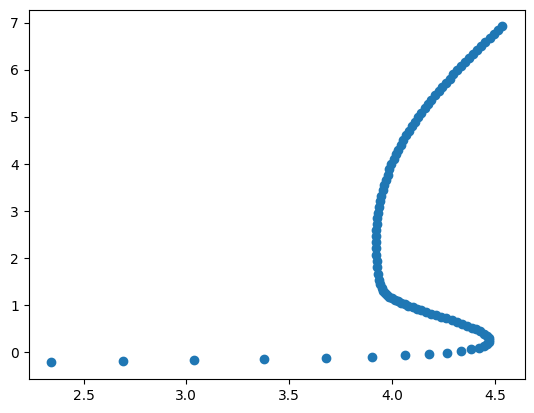

Epoch 0, Loss 11.35097885131836 | Validation: 0.999999999880276
Epoch 1000, Loss 6.73734712600708 | Validation: 2.1186352739191534
Epoch 2000, Loss 4.991292476654053 | Validation: 1.6597948086402865
Epoch 3000, Loss 3.7915377616882324 | Validation: 1.2564597215846354
Epoch 4000, Loss 2.9506328105926514 | Validation: 0.947445340702656
Epoch 5000, Loss 2.356910467147827 | Validation: 0.7258509440262749
Epoch 6000, Loss 1.813912272453308 | Validation: 0.5425673008820778
Epoch 7000, Loss 1.4373877048492432 | Validation: 0.4822549470368492
Epoch 8000, Loss 1.1559967994689941 | Validation: 0.39478819561507505
Epoch 9000, Loss 0.9563298225402832 | Validation: 0.30922702556802895
Epoch 10000, Loss 0.815093994140625 | Validation: 0.24684394361595136
Epoch 11000, Loss 0.7120182514190674 | Validation: 0.21214011163133037
Epoch 12000, Loss 0.6340739727020264 | Validation: 0.1910744950373366
Epoch 13000, Loss 0.5749831199645996 | Validation: 0.1787806544273271
Epoch 14000, Loss 0.5301215648651123 |

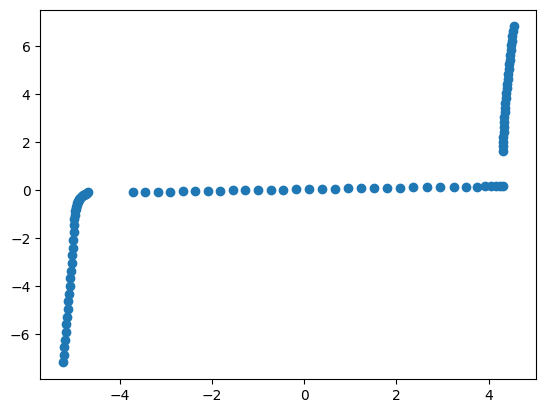

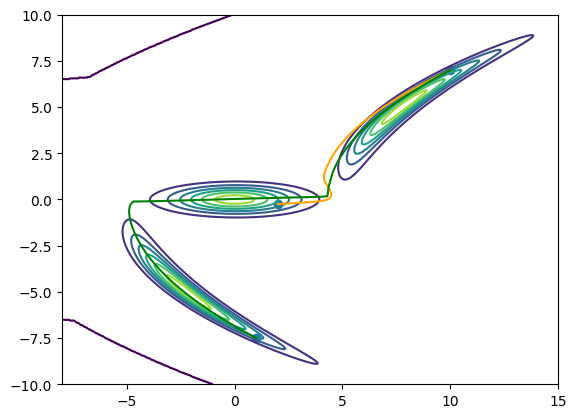

In [6]:
# test interpolation
t = torch.linspace(0.,1.,200)

geodesic_x0_x1 = double_banana_manifold.geodesic(x0,x1,t, L=L, tol=tol, max_iter=max_iter, step_size=step_size).detach().numpy()
geodesic_x0_x2 = double_banana_manifold.geodesic(x0,x2,t, L=L, tol=tol, max_iter=max_iter, step_size=step_size).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic_x0_x1[:,0], geodesic_x0_x1[:,1], color="orange")
plt.plot(geodesic_x0_x2[:,0], geodesic_x0_x2[:,1], color="green")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_triple_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

Epoch 0, Loss 13.044135093688965 | Validation: 0.999999999880276
Epoch 1000, Loss 7.9435038566589355 | Validation: 2.1186352739191534
Epoch 2000, Loss 5.973875999450684 | Validation: 1.6597948086402865
Epoch 3000, Loss 4.6520466804504395 | Validation: 1.2564597215846354
Epoch 4000, Loss 3.7501144409179688 | Validation: 0.947445340702656
Epoch 5000, Loss 3.10516095161438 | Validation: 0.7258509440262749
Epoch 6000, Loss 2.516580581665039 | Validation: 0.5425673008820778
Epoch 7000, Loss 2.0990169048309326 | Validation: 0.4822549470368492
Epoch 8000, Loss 1.7803682088851929 | Validation: 0.39478819561507505
Epoch 9000, Loss 1.5466570854187012 | Validation: 0.30922702556802895
Epoch 10000, Loss 1.3741416931152344 | Validation: 0.24684394361595136
Epoch 11000, Loss 1.2421975135803223 | Validation: 0.21214011163133037
Epoch 12000, Loss 1.1375066041946411 | Validation: 0.1910744950373366
Epoch 13000, Loss 1.0535619258880615 | Validation: 0.1787806544273271
Epoch 14000, Loss 0.985544800758361

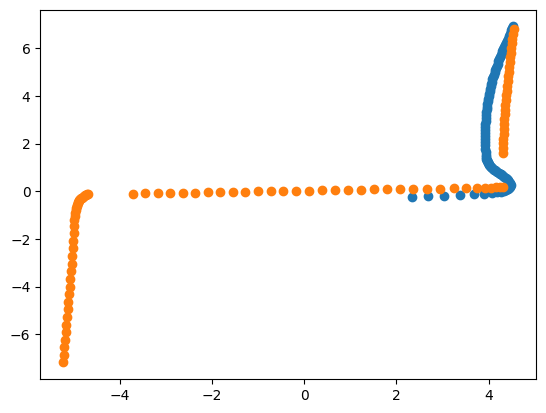

NameError: name 'logarithmic_x0_x2' is not defined

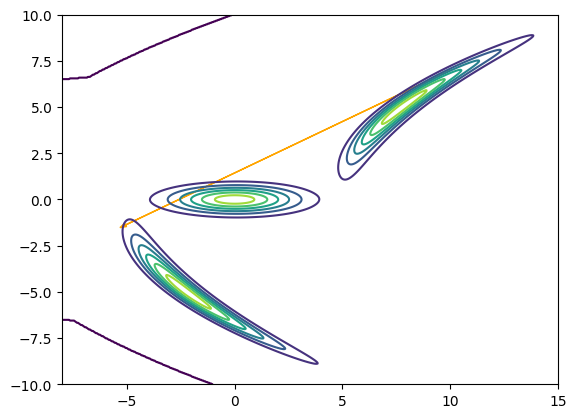

In [7]:
# test logarithmic mapping

logarithmic_x0_x1 = double_banana_manifold.log(x0,torch.cat([x1[None],x2[None]]), L=L, tol=tol, max_iter=max_iter, step_size=step_size)[0].detach().numpy()
# logarithmic_x0_x2 = double_banana_manifold.log(x0,x2[None], L=L, tol=tol, max_iter=max_iter, step_size=step_size)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2, color="orange")
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2, color="green")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_triple_banana/logarithmic.eps")
plt.show()

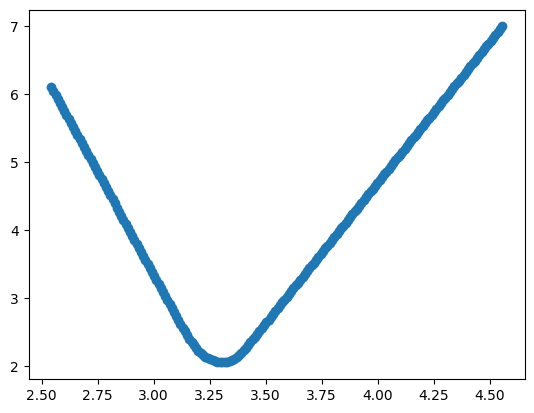

NameError: name 'logarithmic_x0_x2' is not defined

In [8]:
# test exponential mapping
exponential_to_x1 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x1)[None], L=2*L, tol=1e-4)[0].detach().numpy()
exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None], L=2*L, tol=1e-4)[0].detach().numpy()
# exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None])[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2)
plt.scatter(exponential_to_x1[0], exponential_to_x1[1], color="orange")
plt.scatter(exponential_to_x2[0], exponential_to_x2[1], color="green")
plt.savefig("results/quadratic_triple_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(torch.tensor(exponential_to_x1) - x1)}")
print(f"The error between exp_x0(log_x0 (x2)) and x2 is {torch.norm(torch.tensor(exponential_to_x2) - x2)}")

In [ ]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

NameError: name 'banana_manifold' is not defined

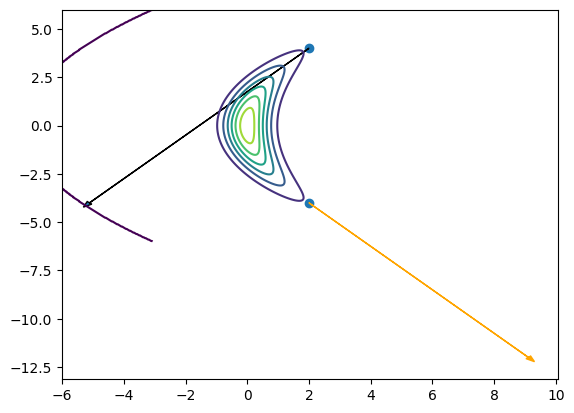

In [ ]:
# test parallel transport
parallel_transport = banana_manifold.parallel_transport(x0, logarithmic[None], x1)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_triple_banana/parallel-transport.eps")
plt.show()


tensor([4.0000, 0.2500])
constructed a Riemannian autoencoder with d_eps = 1 and eps = 0.05882352963089943


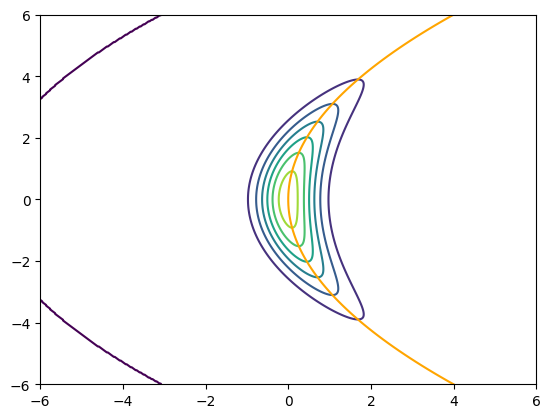

In [ ]:
# Riemannian autoencoder
# TODO multi auto-encoder
epsilon = 0.1
banana_rae = DeformedGaussianRiemannianAutoencoder(banana_manifold, epsilon)

p = torch.linspace(-6, 6, 100)[:,None]
rae_decode_p = banana_rae.decode(p)

plt.contour(x_grid, y_grid, density_banana)
plt.plot(rae_decode_p[:,0], rae_decode_p[:,1], color="orange")
plt.savefig("results/quadratic_triple_banana/rae_manifold.eps")
plt.show()

minimal curvature = -1858.8900146484375 and maximal curvature = 72.31524658203125


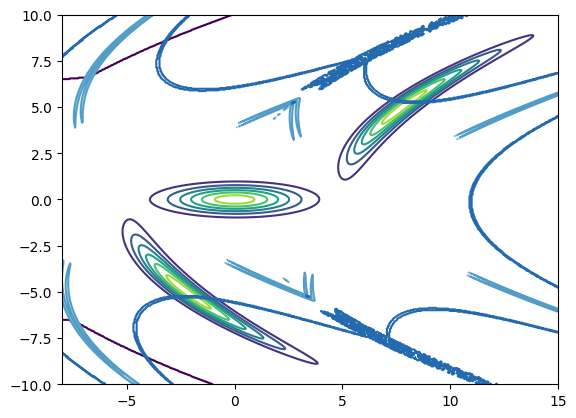

In [14]:
ricci_scalar = double_banana_manifold.ricci_scalar(xy_grid.reshape(-1,2)).reshape(x_grid.shape)

print(f"minimal curvature = {ricci_scalar.min()} and maximal curvature = {ricci_scalar.max()}")

log_squared_ricci_scalar = torch.log(ricci_scalar **2)

plt.contour(x_grid, y_grid, density_banana)
plt.contour(x_grid, y_grid, ricci_scalar, cmap='RdBu')
# plt.contour(x_grid, y_grid, log_squared_ricci_scalar, cmap='RdBu')
plt.savefig("results/quadratic_triple_banana/ricci-scalar.eps")
plt.show()